In [77]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import matplotlib.animation as animation
import glob, re, os
import pandas as pd
import seaborn as sns


import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

%matplotlib inline

In [78]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [79]:
dataset_path_dir = "../../build/DATASET_COMPLEX_SPAD/"
list_of_files = glob.glob(dataset_path_dir + "*.csv")
latest_file = max(list_of_files, key=os.path.getctime)
dataset_path = latest_file
print("Dataset path: ", dataset_path)
df = pd.read_csv(dataset_path, sep=",", header=0)

Dataset path:  ../../build/DATASET_COMPLEX_SPAD/dataset_complex_2023-03-17_17-25-11.csv


In [80]:
idx_BV = df.columns.get_loc("BreakdownVoltage")
idxBrP = idx_BV + 1
idxDW = idx_BV + 2
idxDoping = np.arange(2, idx_BV, 1)
NbDoping = len(idxDoping)
print("NbDoping: ", NbDoping)

df.dropna()
df.tail()

NbDoping:  200


,TotalLength,DonorLength,Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,Donor_5,Donor_6,Donor_7,...,Acceptors_93,Acceptors_94,Acceptors_95,Acceptors_96,Acceptors_97,Acceptors_98,Acceptors_99,BreakdownVoltage,BreakdownProbability,DepletionWidth
85,8.0,2.388,4.950000e+17,4.950000e+17,4.950000e+17,4.950000e+17,4.950000e+17,4.950000e+17,4.950000e+17,4.950000e+17,...,2.257000e+17,2.692000e+17,3.211000e+17,3.829000e+17,4.567000e+17,5.447000e+17,6.496000e+17,8.841,0.660,0.161
86,8.0,2.640,5.614000e+18,5.614000e+18,5.614000e+18,5.614000e+18,5.614000e+18,5.614000e+18,5.614000e+18,5.614000e+18,...,4.517000e+17,3.855000e+17,3.289000e+17,2.806000e+17,2.395000e+17,2.043000e+17,1.743000e+17,6.980,0.698,0.068
87,8.0,2.976,1.617000e+17,1.617000e+17,1.617000e+17,1.617000e+17,1.617000e+17,1.617000e+17,1.617000e+17,1.617000e+17,...,5.856000e+17,5.100000e+17,4.442000e+17,3.869000e+17,3.370000e+17,2.935000e+17,2.556000e+17,18.846,0.643,0.563
88,8.0,0.872,7.273000e+16,7.273000e+16,7.273000e+16,7.273000e+16,7.273000e+16,7.273000e+16,7.273000e+16,7.273000e+16,...,9.829000e+16,9.616000e+16,9.408000e+16,9.204000e+16,9.005000e+16,8.810000e+16,8.619000e+16,20.009,0.600,0.643
89,8.0,3.000,2.931000e+17,2.931000e+17,2.931000e+17,2.931000e+17,2.931000e+17,2.931000e+17,2.931000e+17,2.931000e+17,...,2.055000e+17,2.394000e+17,2.790000e+17,3.251000e+17,3.788000e+17,4.414000e+17,5.143000e+17,15.356,0.690,0.402


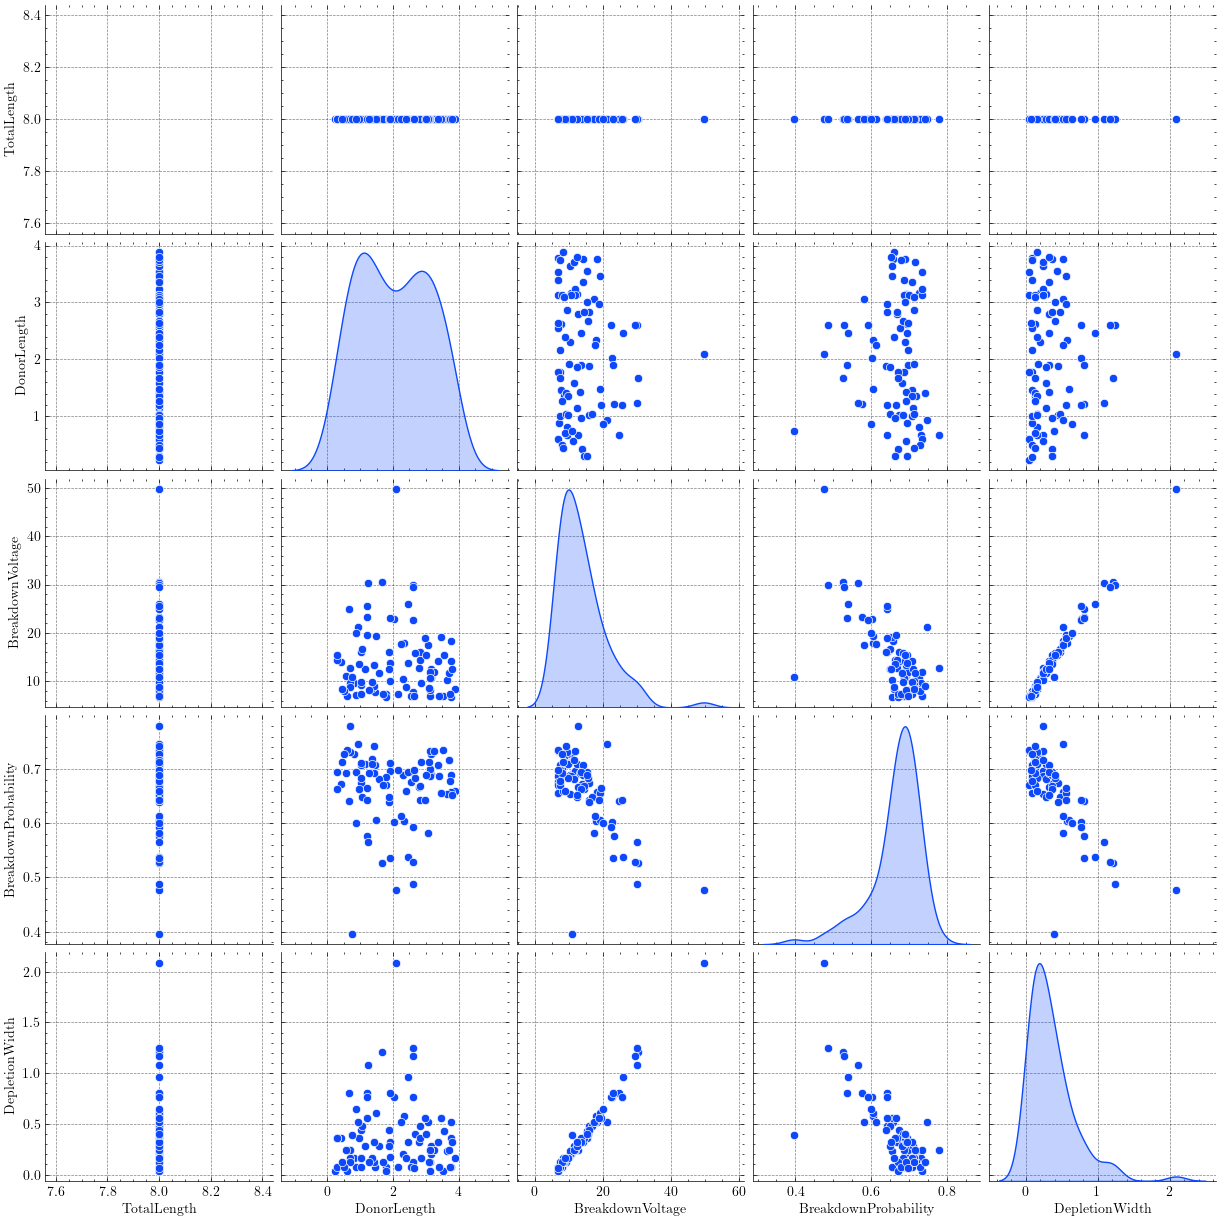

In [81]:
pp = sns.pairplot(df[["TotalLength", "DonorLength", "BreakdownVoltage", "BreakdownProbability", "DepletionWidth"]], diag_kind="kde")
plt.show()

(90, 100)
(90, 100)
(90, 100)
NbPartPlot:  16


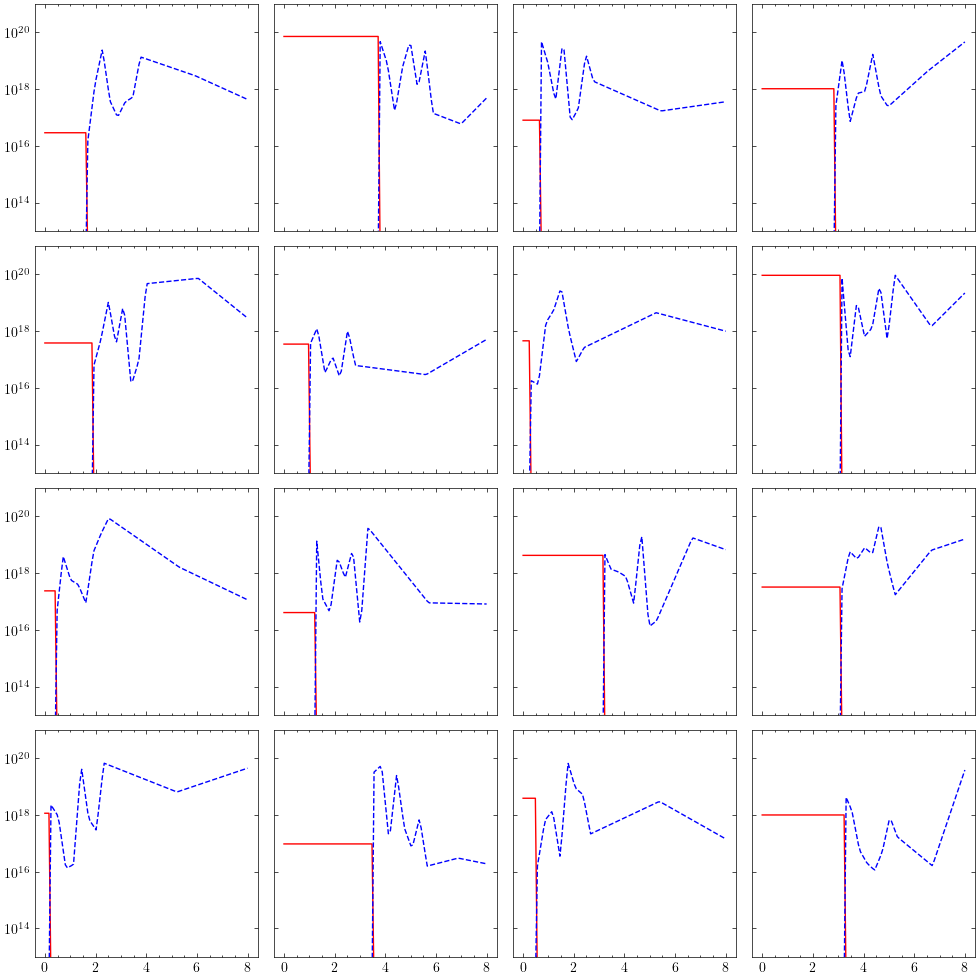

In [82]:
NbPart = len(df)
TotalLength = df["TotalLength"].to_numpy()

Acceptors = df[df.iloc[:, 2:idx_BV//2+1].columns].to_numpy()
Donors = df[df.iloc[:, idx_BV//2+1:idx_BV].columns].to_numpy()
print(Acceptors.shape)
print(Donors.shape)
NetDoping = Donors - Acceptors
print(NetDoping.shape)


NXY = 4
iter0 = 0
fig, axs = plt.subplots(NXY, NXY, sharex=True, sharey=True, figsize=(10, 10))


for ax_ in axs.flat:
    ax_.set_yscale('log')
    # ax_.set_xticklabels([])
    # ax_.set_yticklabels([])
    ax_.grid()

cmap = plt.get_cmap('jet')
NbPartPlot = min(NXY*NXY, NbPart)
print("NbPartPlot: ", NbPartPlot)
for i in range(NbPartPlot):
    X = np.linspace(0, TotalLength[i], NbDoping//2)
    p = i % NXY
    q = i // NXY
    c = cmap(np.random.rand())
    axs[p, q].plot(X, Acceptors[i, :], color='r')
    axs[p, q].plot(X, Donors[i, :], color='b')
    axs[p, q].set_ylim(1e13, 1e21)

fig.tight_layout()
plt.show()
# fig.savefig("MC_Sampling_DopingProfile_Fancy.png", dpi=300)
# fig.savefig("MC_Sampling_DopingProfile_Fancy.pdf", dpi=300)

(90, 100)
(90, 100)
(90, 100)
NbPartPlot:  90


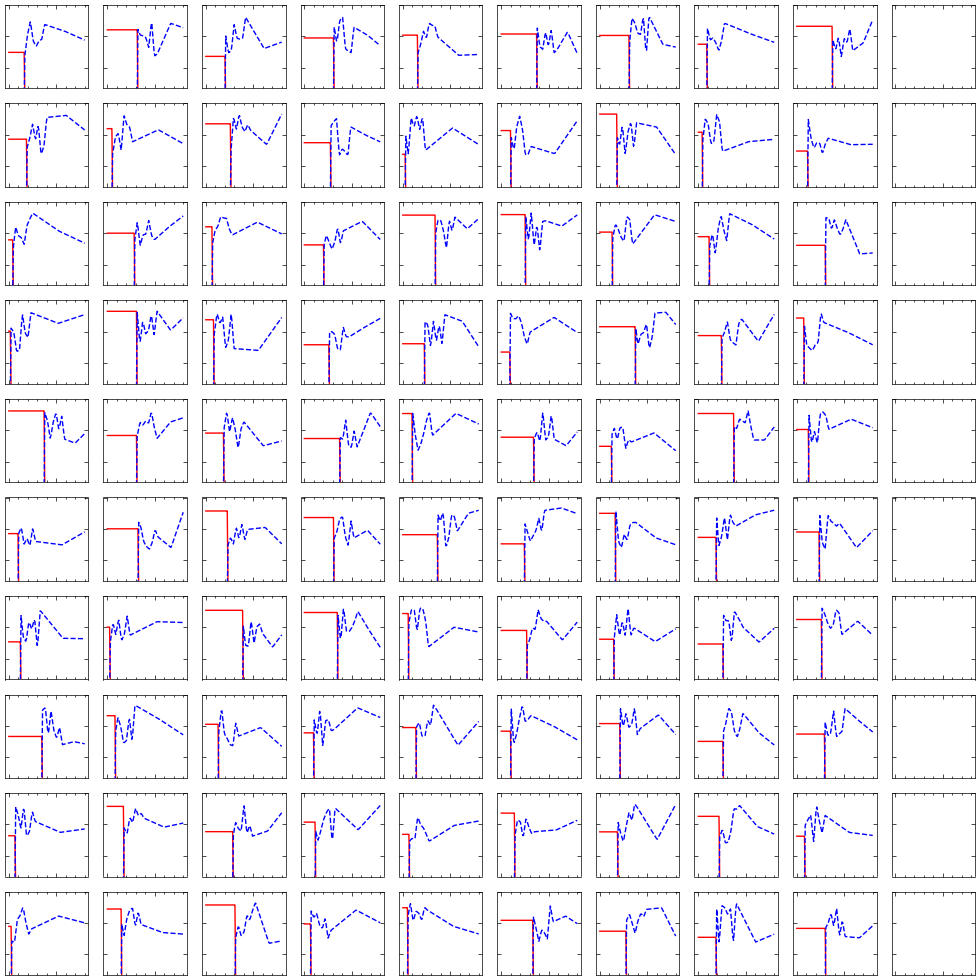

In [83]:
NbPart = len(df)
TotalLength = df["TotalLength"].to_numpy()

Acceptors = df[df.iloc[:, 2:idx_BV//2+1].columns].to_numpy()
Donors = df[df.iloc[:, idx_BV//2+1:idx_BV].columns].to_numpy()
print(Acceptors.shape)
print(Donors.shape)
NetDoping = Donors - Acceptors
print(NetDoping.shape)


NXY = 10
iter0 = 0
fig, axs = plt.subplots(NXY, NXY, sharex=True, sharey=True, figsize=(10, 10))


for ax_ in axs.flat:
    ax_.set_yscale('log')
    ax_.set_xticklabels([])
    ax_.set_yticklabels([])
    ax_.grid()

cmap = plt.get_cmap('jet')
NbPartPlot = min(NXY*NXY, NbPart)
print("NbPartPlot: ", NbPartPlot)
for i in range(NbPartPlot):
    X = np.linspace(0, TotalLength[i], NbDoping//2)
    p = i % NXY
    q = i // NXY
    c = cmap(np.random.rand())
    axs[p, q].plot(X, Acceptors[i, :], color='r')
    axs[p, q].plot(X, Donors[i, :], color='b')
    axs[p, q].set_ylim(1e13, 1e21)

fig.tight_layout()
plt.show()
# fig.savefig("MC_Sampling_DopingProfile_Fancy.png", dpi=300)
# fig.savefig("MC_Sampling_DopingProfile_Fancy.pdf", dpi=300)

In [84]:
TotalLength = df["TotalLength"].to_numpy()
DonorLength = df["DonorLength"].to_numpy()
BreakdownVoltage = df["BreakdownVoltage"].to_numpy()
BreakdownProbability = df["BreakdownProbability"].to_numpy()
DepletionWidth = df["DepletionWidth"].to_numpy()


Text(0, 0.5, 'Depletion Width ($\\mu$m)')

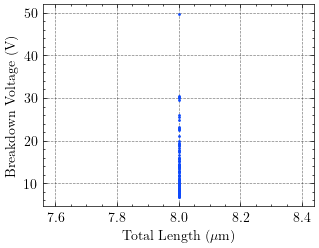

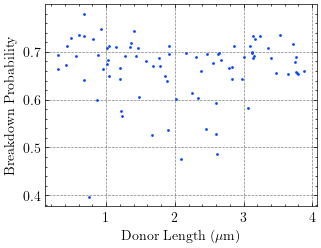

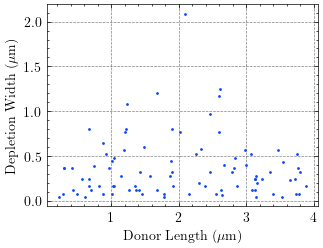

In [85]:
fig, axs = plt.subplots()
axs.scatter(TotalLength, BreakdownVoltage, s=1)
axs.set_xlabel("Total Length ($\mu$m)") 
axs.set_ylabel("Breakdown Voltage (V)")

fig, axs = plt.subplots()
axs.scatter(DonorLength, BreakdownProbability, s=1)
axs.set_xlabel("Donor Length ($\mu$m)")
axs.set_ylabel("Breakdown Probability")

fig, axs = plt.subplots()
axs.scatter(DonorLength, DepletionWidth, s=1)
axs.set_xlabel("Donor Length ($\mu$m)")
axs.set_ylabel("Depletion Width ($\mu$m)")
